# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 3 - Covarianza y Correlación
### Pilar García Murillo y Sonia Ruiz Pérez

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [2]:
# Importamos las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Creamos un dataframe con el csv de los datos de nuestro estudio.
df = pd.read_csv("files/taxis1.csv", index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

`La diferencia entre la covarianza y la correlación es que la correlación, además de comprobar la dirección de la relación entre dos variables, también comprueba la "fuerza" de esa relación. Cuando el signo de la covarianza o la correlación es positivo, tienen una relación directa, es decir, cuando aumenta una variable, aumenta la otra (o cuando diminuye una variable, disminuye la otra). Cuando el signo es negativo, tiene una relación inversa, es decir, al aumentar una variable, disminuye la otra o al diminuir una aumenta la otra.`
`En el caso de la correlación, cuando se acerca a 1 o -1, nos indica una relación fuerte entre esas variables, y cuando se acerca a 0 indica una relación débil o inexistente.`

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

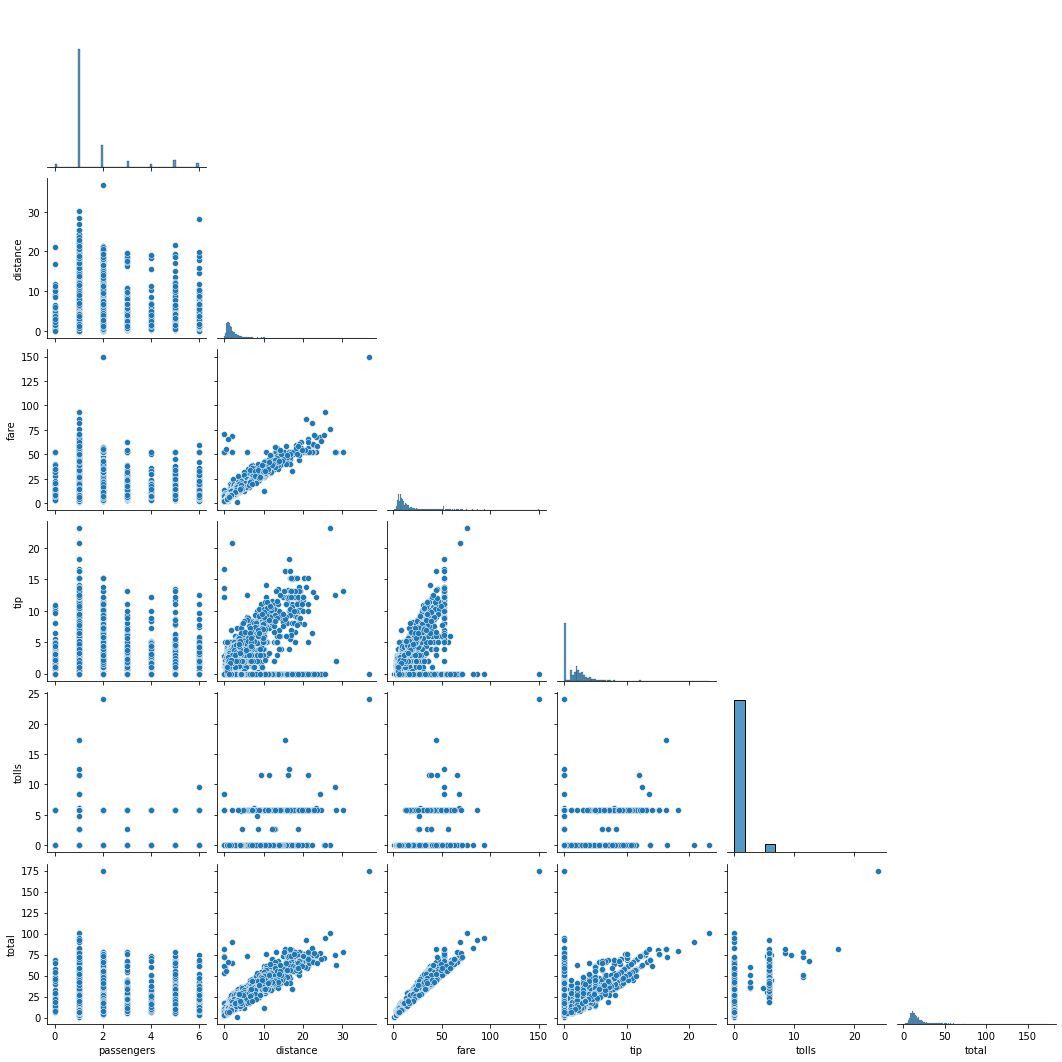

In [5]:
#Representamos las variables de nuetro dataframe frente a las demás para observar alguna
#  posible relación entre ellas.
sns.pairplot(df, corner=True);

`Al observar los gráficos obtenidos en el pairplot, vemos que puede haber una relación entre las variables "fare" y "distance", por otra parte "total" y "distance" y en último lugar "total" y "fare". En las tres posibles relaciones parece que hay una relación directa, cuando aumenta una, aumenta la otra.`

In [8]:
#Obtenemos la covarianza de las variables numéricas de nuestro dataframe.
df.cov()

/tmp/ipykernel_14937/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,passengers,distance,fare,tip,tolls,total
passengers,1.459137,0.024629,-0.011808,0.050893,-0.004772,0.131098
distance,0.024629,13.836727,37.808712,4.190612,3.271415,44.763000
fare,-0.011808,37.808712,114.966632,12.335754,9.060628,135.012295
tip,0.050893,4.190612,12.335754,5.578555,1.340980,19.902521
tolls,-0.004772,3.271415,9.060628,1.340980,1.874639,12.250192
total,0.131098,44.763000,135.012295,19.902521,12.250192,167.711953


`Al realizar la covarianza para todas las variables numericas de nuestro dataframe, observamos que hay 2 relaciones negativas ("passengers"-"fare" y "passengers"-"tolls") y el resto son positivas.`

In [10]:
#Realizamos el análisis de correlación para todas las variables numéricas de nuestro dataframe. Indicamos
# que vamos a utilizar la correlación de Pearson (para relaciones lineales) en el método, pero no sería
#  necesario ya que es el método que utiliza la función por defecto.
df.corr(method='pearson')

/tmp/ipykernel_14937/1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.005481,-0.000912,0.017838,-0.002885,0.008380
distance,0.005481,1.000000,0.947958,0.476980,0.642333,0.929224
fare,-0.000912,0.947958,1.000000,0.487101,0.617182,0.972311
tip,0.017838,0.476980,0.487101,1.000000,0.414670,0.650677
tolls,-0.002885,0.642333,0.617182,0.414670,1.000000,0.690879
total,0.008380,0.929224,0.972311,0.650677,0.690879,1.000000


`Al realizar la correlación de forma analítica, confirmamos nuestras suposiciones, existe una relación directa entre las variables:`
- `"total" y "fare"`
- `"fare" y "distance"`
- `"total" y "distance"`

`Siendo esta correlación muy alta ya que se encuentra entre 0.8 y 1.`

`También existe una relación alta (entre 0.6 y 0.8) entre las siguientes variables:`
- `"tolls" con "distance"`
- `"tolls" con "fare"`
- `"total" con "tolls"`
- `"total" con "tip".`

`Cabe añadir que no existe una relación entre las variables que observamos inicialmente una posible relación indirecta con la covarianza ("passengers"-"fare" y "passengers"-"tolls").`

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

/tmp/ipykernel_14937/1366013465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df.corr(),dtype=np.bool_))
/tmp/ipykernel_14937/1366013465.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='PiYG',mask=mask,annot=True)


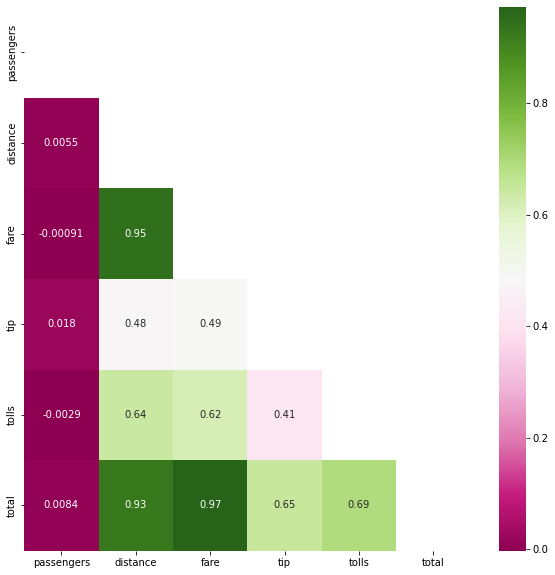

In [17]:
#Creamos un heatmap donde creando una máscara eliminamos las correlaciones de la esquina superior derecha.
mask=np.triu(np.ones_like(df.corr(),dtype=np.bool_))

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='PiYG',mask=mask,annot=True)
plt.savefig('figures/heatmap_taxis_corr.png')
plt.show();

`Al observar el heatmap podemos confirmar lo que observamos en la tabla de correlación de las variables numéricas.`

4. Guardad la gráfica del heatmap.

`Hemos guardado la figura al crearla en la celda anterior.`

**Happy coding**💪🏽